## Zaman Serisi Analizi
Zaman içerisinde gelişen olayların ve işlemleri analizi kullanılan tekniklerdir.
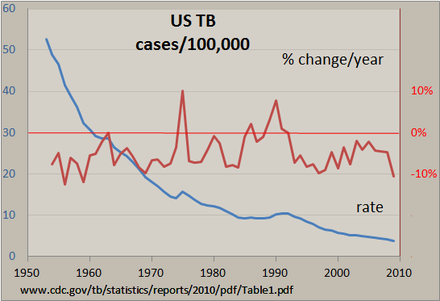
https://productphilosophy.com/zaman-serisi-analizi/

## TIME SERIES DECOMPOSITION (Zaman Serisinin Ayrıştırılması
### Trend + Mevsimsel + Döngüsel bileşenlerine ayrıştırma

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
# statsmodels kütüphanesi kurulu değilse !pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose 

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/AirPassengers.csv", 
                 parse_dates=["Month"], index_col=['Month']) 

In [9]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


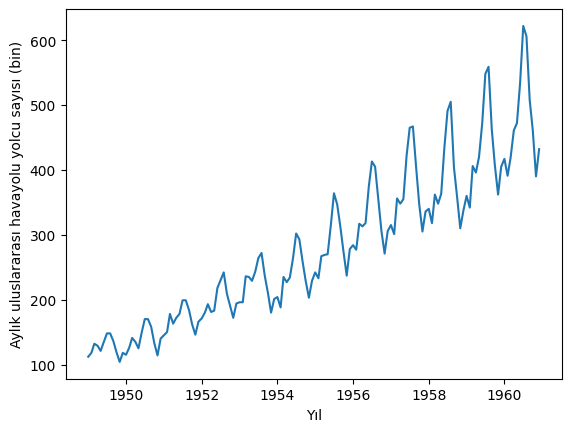

In [12]:
fig, ax = plt.subplots()
plt.plot(df)
plt.xlabel("Yıl")
plt.ylabel("Aylık uluslararası havayolu yolcu sayısı (bin)")
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

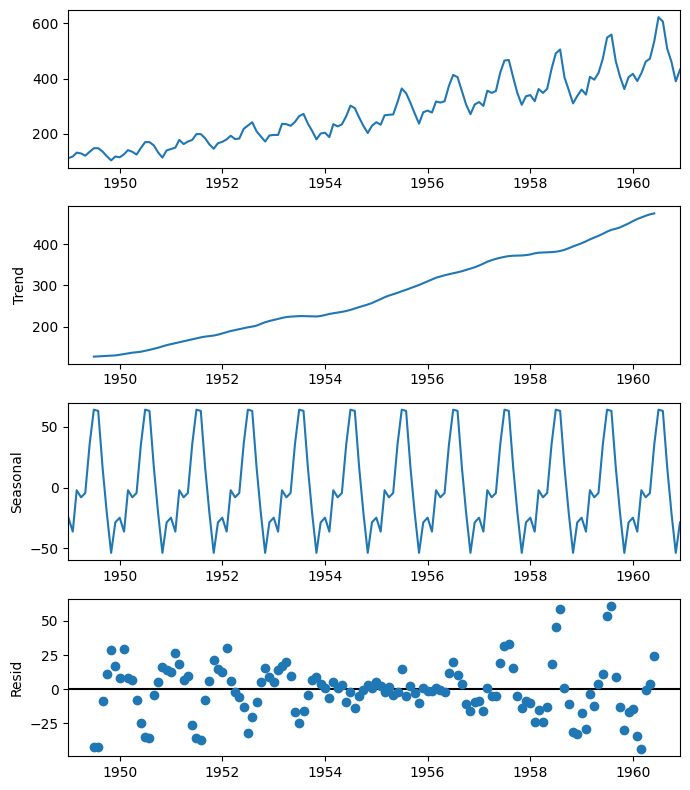

In [13]:
# Zaman serisinin bileşenlerine ayrıştırılması
plt.rcParams['figure.figsize'] = [7, 8]

sd = seasonal_decompose(df, period=12).plot()

## ARIMA: Autoregressive Integrated Moving Average
https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

In [16]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
# !pip install pmdarima
from pmdarima.arima import auto_arima

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/AirPassengers.csv", 
                 parse_dates=["Month"], index_col=['Month']) 

In [18]:
# Problem: 1957 Aralık ayına kadar olan veriyi kullanarak, 1958-1960 yıllarında gerçekleşecek yolcu sayısını tahmin etmek
# Veri setinin ayrılması
trn = df.loc[df.index < '1958-01-01']
tst = df.loc[df.index >= '1958-01-01']

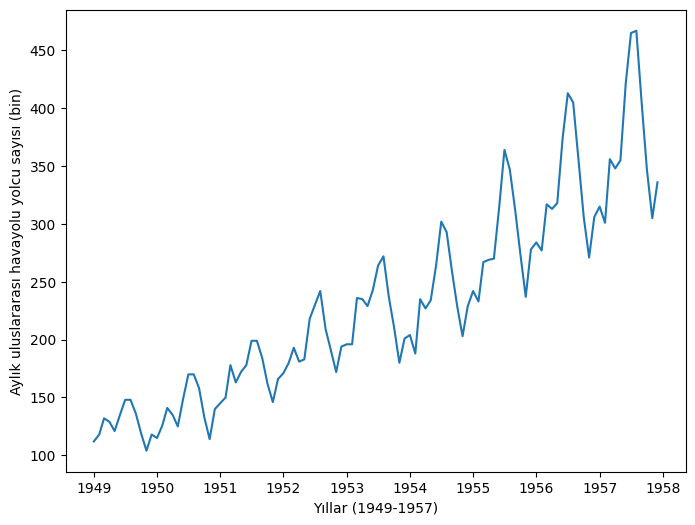

In [21]:
#plot
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots()
plt.plot(trn)
plt.xlabel("Yıllar (1949-1957)")
plt.ylabel("Aylık uluslararası havayolu yolcu sayısı (bin)")
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

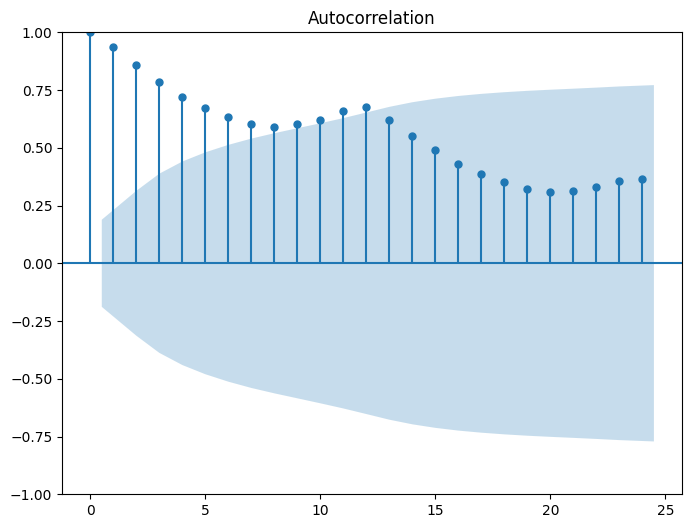

In [23]:
# ARIM
# 1. adım
# ARIMA tekniğini kullanabilmek için veriğinin "durağan olmaması gerekir" (non-stationary)
# http://www.veridefteri.com/2022/01/08/zaman-serileri-analizi-5-duraganlik-ve-birim-kok-testleri/
trn_acf = plot_acf(trn,lags=24)

## ARIMA modeli

In [24]:
auto_arima_model = auto_arima(trn, m=12, with_intercept=False, suppress_warnings=True)
print(auto_arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -350.001
Date:                            Tue, 06 Dec 2022   AIC                            704.001
Time:                                    09:51:20   BIC                            709.109
Sample:                                01-01-1949   HQIC                           706.065
                                     - 12-01-1957                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2411      0.091     -2.648      0.008      -0.420      -0.063
sigma2        92.7499     13.439   

In [27]:
# Yukarıdaki çıktıda yer alan Model bilgileri
print("Model order: ",auto_arima_model.order)
print("Seasonal Order: ",auto_arima_model.seasonal_order)

Model order:  (1, 1, 0)
Seasonal Order:  (0, 1, 0, 12)


In [28]:
auto_arima_model.fit(trn)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [29]:
arima_tahmin = auto_arima_model.predict(n_periods=36, alpha=0.05, return_conf_int=True)

In [33]:
y_tahmin = pd.Series(arima_tahmin[0], index=tst.index)
y_tahmin_lb, y_tahmin_up = arima_tahmin[1][:,0], arima_tahmin[1][:,1]

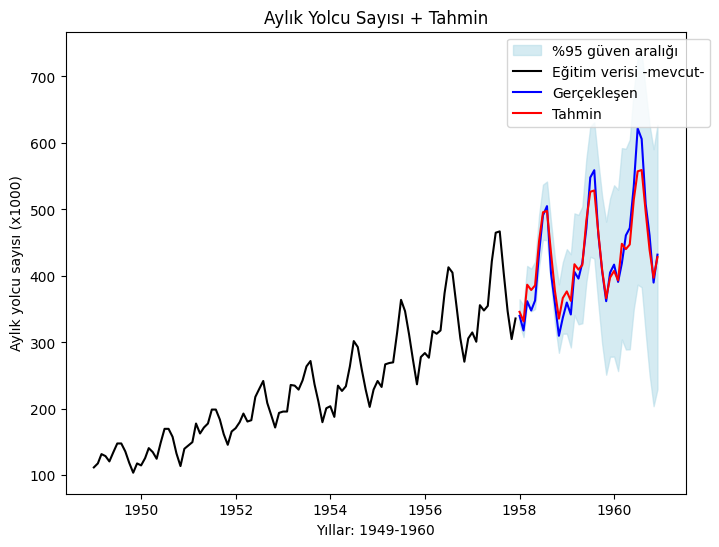

In [34]:
# Grafik
fig, ax = plt.subplots()
plt.xlabel("Yıllar: 1949-1960")
plt.ylabel('Aylık yolcu sayısı (x1000)')
plt.title('Aylık Yolcu Sayısı + Tahmin')
plt.fill_between(tst.index, y_tahmin_lb, y_tahmin_up, color='lightblue', alpha=0.5, label='%95 güven aralığı')
plt.plot(trn, color='black', label='Eğitim verisi -mevcut-')
plt.plot(tst, color='blue', label='Gerçekleşen')
plt.plot(y_tahmin, color='red', label='Tahmin')
plt.legend(bbox_to_anchor=(1.05, 1))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

## MLP: Multi Layer Perceptron

### Yapay Zeka

https://en.wikipedia.org/wiki/Multilayer_perceptron

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/AirPassengers.csv", 
                 parse_dates=["Month"], index_col=['Month']) 

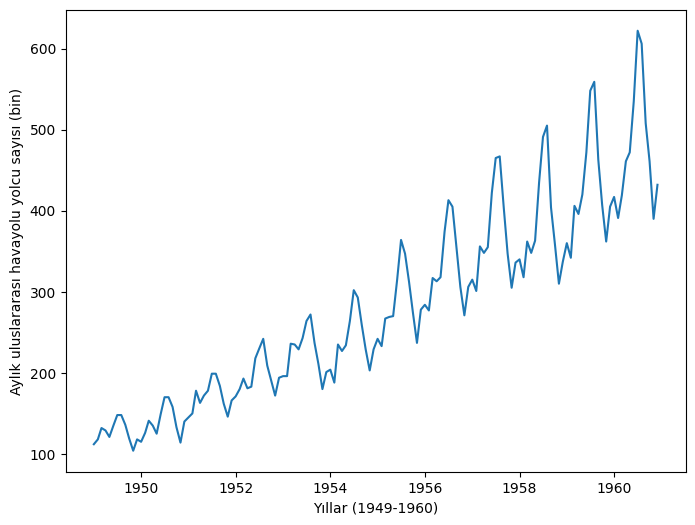

In [37]:
#plot
plt.rcParams['figure.figsize'] = [8, 6]
fig, ax = plt.subplots()
plt.plot(df)
plt.xlabel("Yıllar (1949-1960)")
plt.ylabel("Aylık uluslararası havayolu yolcu sayısı (bin)")
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

In [38]:
df.shape

(144, 1)

In [39]:
# veriyi yeni şekil (reshape)
k = 12
Z = []
for i in range(k+1, df.shape[0]+1):
    Z.append(df.iloc[(i-k-1):i, 0])
Z = np.array(Z)

In [40]:
Z.shape

(132, 13)

In [42]:
print(Z)

[[112 118 132 ... 104 118 115]
 [118 132 129 ... 118 115 126]
 [132 129 121 ... 115 126 141]
 ...
 [407 362 405 ... 606 508 461]
 [362 405 417 ... 508 461 390]
 [405 417 391 ... 461 390 432]]


In [44]:
df.head(13)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [54]:
split = np.int(0.8 * Z.shape[0])
Z_train, Z_test = Z[:split, :], Z[split:,:]

In [55]:
Z_train.shape

(105, 13)

In [56]:
Z_test.shape

(27, 13)

In [57]:
# Scaling
scaler = StandardScaler().fit(Z_train)
Z_train = scaler.transform(Z_train)
Z_test = scaler.transform(Z_test)

In [58]:
X_train, y_train = Z_train[:, :-1], Z_train[:,-1]
X_test, y_test = Z_test[:,:-1], Z_test[:, -1]

In [60]:
# Fit MLP with %20 validation set
split_ = np.int(0.8 * X_train.shape[0])
X_train_, y_train_ = X_train[:split_,:], y_train[:split_]
X_valid_, y_valid_ = X_train[split_:,:], y_train[split_:]

In [61]:
print(X_train_.shape, y_train_.shape)

(84, 12) (84,)


In [63]:
print(X_valid_.shape, y_valid_.shape)

(21, 12) (21,)


In [64]:
# Validation loss function (Mean Square Error kullanarak)
def validation_loss(hidden_neurons):
    mlp = MLPRegressor(hidden_layer_sizes=(hidden_neurons,), max_iter=500, random_state=1, shuffle=False)
    mlp.fit(X_train_, y_train_)
    return mean_squared_error(y_valid_, mlp.predict(X_valid_))

In [65]:
params = [10, 25, 30, 50, 75]
mse = [validation_loss(p) for p in params]

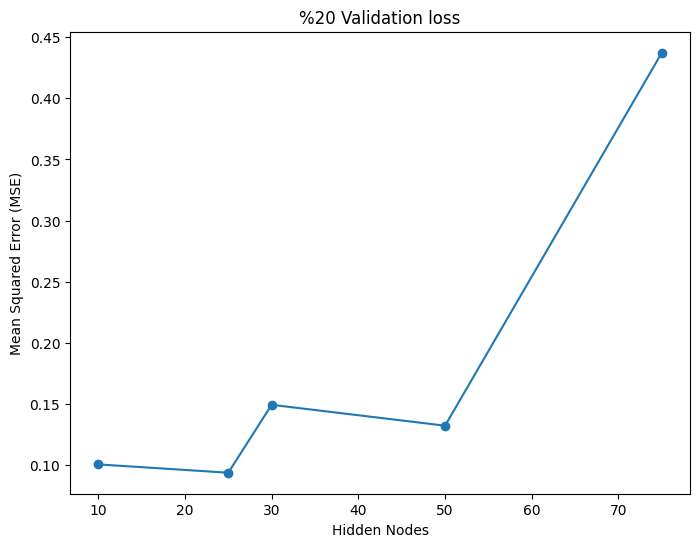

In [66]:
# Hidden node sayısına bağlı olarak hata grafiği
fig, ax = plt.subplots()
plt.xlabel('Hidden Nodes')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('%20 Validation loss')
plt.plot(params, mse, '-o')

In [67]:
# MLP Hidden Node sayısı 25 alınabilir. Çünkü bu değer için MSE en düşük
mlp = MLPRegressor(hidden_layer_sizes=(25,), max_iter=500, random_state=1, shuffle=False)

In [68]:
mlp.fit(X_train, y_train) # MLP fit with training data
y_pred = mlp.predict(X_test)  # Forecast

In [69]:
# Verinin ilk ölçeğine döndürülmesi
y_test_ = scaler.inverse_transform(np.hstack([X_test, y_test.reshape(-1,1)]))[:, -1]
y_pred_ = scaler.inverse_transform(np.hstack([X_test, y_pred.reshape(-1,1)]))[:, -1]

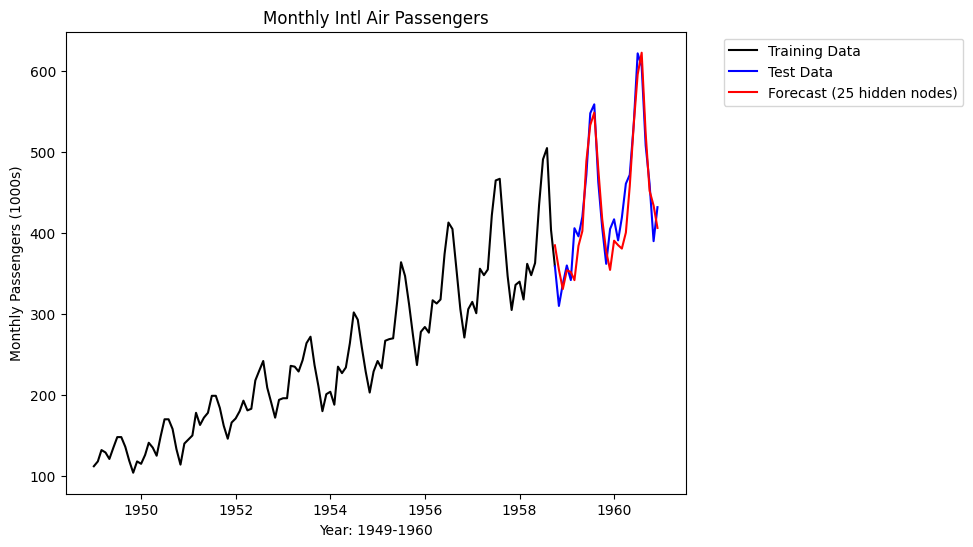

In [70]:

fig, ax = plt.subplots()
plt.xlabel('Year: 1949-1960')
plt.ylabel('Monthly Passengers (1000s)')
plt.title('Monthly Intl Air Passengers')
plt.plot(df.iloc[:(k + len(y_train) + 1), :], color='black', label='Training Data')
plt.plot(pd.Series(y_test_, index=df.index[-len(y_test):]), color='blue', label='Test Data')
plt.plot(pd.Series(y_pred_, index=df.index[-len(y_test):]), color='red', label='Forecast (25 hidden nodes)')
plt.legend(bbox_to_anchor=(1.05, 1))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))